In [67]:
from numpy.random import normal,multivariate_normal
import numpy as np
from numpy.linalg import inv
from numpy import genfromtxt

from scipy import *
from scipy.linalg import norm, pinv, det
from scipy.optimize import minimize



import matplotlib.pyplot as plt
#import numdifftools as nd

from PIL import Image
import matplotlib.image as mping

import pandas as pd


In [16]:
def kmeans(x,k):
    n = x.shape[0]
    n_iterations = 1000
    epsilon = 1e-8
    err = np.inf

    #initialize random centroids
    c = np.zeros((k,x.shape[1]))
    for i in range(k):
        idx = np.random.randint(n)
        c[i] = x[idx,:]

    for iteration in range(n_iterations):
        d = np.zeros((n, k))  # distances to centroids square
        for i in range(k):
            d[:, i] = np.sqrt(np.sum(np.square(np.subtract(x, np.tile(c[i, :], (n, 1)))), 1).flatten())

        #assign each point to nearest centroid
        l = np.argmin(d,1)


        #recompute centroids as center of mass of each cluster
        for j in range(k):
            if len(l[l==j]):
                c[j,:] = x[l==j].sum(0) / len(l[l==j])

        err_new = np.sum(np.min(d,1))/n


        if np.abs(err_new - err)<epsilon:
            break
        err = err_new

    return c,l,err    

In [17]:
#Kernel function 
def gaussianKernel(Mean, Sigma, x):
    return np.sqrt(1/(2*pi*det(Sigma))) * exp((-1/2)*dot((x-Mean).T,dot(inv(Sigma),x-Mean)))

#activation fills the Phi (in the pdf)
def activation(X, Means, Sigma):
    n = X.shape[0]
    
    # calculate activations of RBFs
    Phi = zeros((n, n), float)
    
    for i in range(n):
        for j in range(n):
            print(Means[i,:])
            Phi[i,j] = gaussianKernel(Means[i,:], Sigma, X[j,:])
    return Phi


def trainRidgeRegression(X, Y, Sigma, Lambda):
    
    #Dimensions
    #X: n x Inputdimension
    #y: n x OutputDimension
    
    n = X.shape[0]
    d = X.shape[1]
    
    #Centers are the neurons in our RBF network
    
    #newCenters = kmeans(X,numNeurons)
    #centers = newCenters[0]
    
    
    #Calculate Activation matrix
   
    Phi = activation(X, X, Sigma)
    
    # calculate output weights (pseudoinverse)
    #W = dot(pinv(Phi), Y) #written by Victor
    
    W = dot(dot(inv(Lambda*np.identity(d)+dot(Phi.T, Phi)),Phi.T),Y)
 
    #Calculate the covariance matrix Q with formula (6.18) 
    
    #Q = dot(np.transpose(Y),Y) - dot(np.transpose(W), dot(np.transpose(Phi), Y)) #written by Victor
    #Q = np.zeros((d,d))
    #for i in range(n):
    #    for k in range(d):
    #        for l in range(d):
    #            Q[k,l] += (1/float(n))*(Y[i,k] - dot(Phi[i,:],W[:,k]))*(Y[i,l] - dot(Phi[i,:],W[:,k]))
        
    #Q = (1/n)*Q
    
    return W

In [23]:
#Read the data 
Xtr = genfromtxt('Xtr.csv', delimiter = ',')
d = Xtr.shape[1]

Xtr = np.delete(Xtr, (d-1), axis = 1)

Ytr = pd.read_csv('Ytr.csv')
Ytr = np.array(Ytr)
Ytr = np.delete(Ytr, (0), axis = 1)

n = Xtr.shape[0]
d = Xtr.shape[1]



(array([   7,   26,   34,   57,   72,   73,   97,  123,  125,  133,  138,
        143,  150,  154,  164,  165,  175,  188,  191,  200,  221,  242,
        250,  276,  279,  284,  317,  326,  343,  357,  358,  371,  377,
        388,  393,  400,  410,  437,  441,  459,  471,  473,  474,  477,
        484,  512,  516,  518,  519,  524,  547,  549,  577,  586,  589,
        597,  610,  630,  637,  643,  653,  661,  678,  680,  689,  704,
        719,  721,  737,  742,  755,  759,  768,  777,  783,  794,  796,
        799,  814,  824,  828,  832,  844,  847,  848,  852,  865,  874,
        876,  896,  902,  903,  908,  913,  918,  926,  928,  937,  942,
        944,  957,  967,  971,  974, 1014, 1022, 1085, 1089, 1090, 1095,
       1097, 1105, 1115, 1123, 1128, 1141, 1149, 1156, 1165, 1166, 1167,
       1171, 1178, 1186, 1191, 1231, 1235, 1245, 1247, 1249, 1257, 1263,
       1267, 1276, 1287, 1290, 1293, 1297, 1300, 1303, 1307, 1312, 1327,
       1329, 1350, 1352, 1359, 1372, 1397, 1408, 1

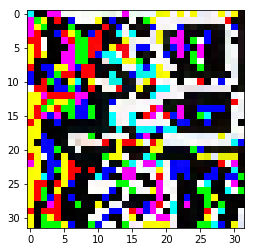

In [19]:
#The block to display images

def displayImage(image):
    plt.imshow(image)
    plt.show()

Im = Xtr[1200]

Im = np.reshape(Im,(3,32,32))
Im = Im.T
displayImage(Im)

In [117]:
Lambda=0.5



def Linear_Kernel(x,y):
    return np.dot(x,y)
def Fill_Gram_Matrix(label1,label2):
    
    x1=Xtr[np.where(Ytr==label1)[0],:]
    x2=Xtr[np.where(Ytr==label2)[0],:]
    x=np.concatenate([x1,x2])
    
    y1=np.ones(x1.shape[0])
    y2=-1*np.ones(x2.shape[0])
    y=np.concatenate([y1,y2])
    
    alpha=np.zeros(x.shape[0])
    K=np.zeros((x.shape[0],x.shape[0]))
    for line in range(x.shape[0]):
        for col in range(x.shape[0]):
            if ( col<=line):
                value= Linear_Kernel(x[line,:],x[col,:])
                K[col,line]=value;
                K[line,col]=value;
                
    return x,y,K;
        
x,y,K=Fill_Gram_Matrix(1,2)
def SVM_dual_function(alpha):
    return -(2*np.dot(alpha,y)-np.dot(alpha,np.dot(K,alpha)))
def SVM_dual_function_Jac(alpha):
    return -(2*y - 2*np.dot(K,alpha))
def SVM_dual_function_Hess(alpha):
    return K

alpha=np.zeros(x.shape[0])
cons = ({'type': 'ineq','fun' : lambda alpha: - y*alpha,
         'type': 'ineq','fun' : lambda alpha: alpha*y - 0.5/Lambda*np.ones(y.shape[0])})
res = minimize(SVM_dual_function,alpha,
               jac=SVM_dual_function_Jac,
               constraints=cons, options={'disp': True})
    



Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4870.55738175
            Iterations: 79
            Function evaluations: 151
            Gradient evaluations: 75


In [118]:
Sigma = np.identity(d)

Lambda = 1
#W = trainRidgeRegression(Xtr, Ytr, Sigma, Lambda)


In [119]:
#print((res.x).shape)
alpha = res.x
#alpha = alpha[alpha > 0 or alpha < 0]


def SVM_function(x_querry):
    value = 0
    for i in range(alpha.shape[0]):
        Current_Image=x[i,:]
        value += alpha[i]*Linear_Kernel(x_querry,Current_Image)
    return np.sign(value)


for i in range(1000):
    error=0
    label_found=SVM_function(x[i,:])
    if(label_found != y[i]):
        error+=1
print(error)
    

        
    

0
